# Final Exam - In Class (45 pts)

## Nisha Dalal nd8288

---
---

In [1]:
%config InlineBackend.figure_format = 'retina'
from scipy import signal
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

---
---
1. The following three questions 1a, 1b and 1c refer to the EEG time series recording in the cell below (*if cell is hidden you can view it by clicking the three dots and you can toggle its visibility by clicking the blue vertical bar to the left of the cell that appears when the cell is selected*).

In [2]:
import numpy as np

# EEG in microvolts (uV)
eeg_uV = np.array([ 7.99263716e-01,  3.20453477e+00,  2.32451677e+00,  2.99096251e+00,
        2.95125079e+00,  2.07323146e+00,  3.67824244e+00,  3.33407354e+00,
        3.18097234e+00,  2.57801104e+00,  2.56908560e+00,  2.23031139e+00,
        2.69823503e+00,  2.76596498e+00,  3.05247116e+00,  1.45715261e+00,
        3.36093020e+00,  3.17861724e+00,  3.18882823e+00,  2.84125400e+00,
        2.82957220e+00,  2.40654016e+00,  2.49908733e+00,  3.93868208e+00,
        3.28607726e+00,  2.90427375e+00,  2.35433936e+00,  2.01281786e+00,
        2.29527426e+00,  1.95660460e+00,  1.77596152e+00,  2.10410547e+00,
        2.30907845e+00,  2.73117661e+00,  3.16049576e+00,  3.11193728e+00,
        3.83683133e+00,  3.36231589e+00,  4.38690233e+00,  3.22657943e+00,
        4.06150150e+00,  3.98803377e+00,  3.33341861e+00,  4.67433119e+00,
        3.93356562e+00,  3.31128120e+00,  3.51423979e+00,  3.50051785e+00,
        2.83747530e+00,  2.86140251e+00,  2.93875647e+00,  2.66065621e+00,
        2.10540080e+00,  2.26423168e+00,  2.70363522e+00,  1.87502515e+00,
        2.24604321e+00,  1.85253787e+00,  1.10646093e+00,  1.93581748e+00,
        8.85520995e-01,  1.55400133e+00,  8.57437849e-01,  2.11681263e-03,
        3.31405520e-01,  7.15300024e-01,  8.17477554e-02,  1.01886165e+00,
        3.58378664e-02,  7.88056478e-02, -5.31301610e-02,  1.15285181e-02,
       -5.70677102e-01, -4.45085853e-01, -4.67251986e-01, -7.64465392e-01,
       -1.38555694e+00, -1.47661817e+00, -1.31803536e+00, -1.33042049e+00,
       -9.26028848e-01, -2.25337815e+00, -2.98349643e+00, -1.75738716e+00,
       -1.75983071e+00, -1.98427296e+00, -1.65334618e+00, -1.48713875e+00,
       -1.82748890e+00, -2.36522126e+00, -8.58658135e-01, -1.02472889e+00,
       -9.83468115e-01, -1.63966632e+00, -8.13248694e-01, -1.11178756e+00,
       -1.53469694e+00, -1.39900362e+00, -2.42044449e+00, -4.58633780e-01,
       -1.24245536e+00, -1.23174298e+00, -1.80914867e+00, -1.09792578e+00,
       -2.19788834e-01, -3.91566187e-01, -5.46141744e-01, -2.61245072e-01,
       -9.71207201e-01,  1.80505276e-01,  2.12751739e-02, -4.99209046e-01,
        2.77782142e-01, -6.39305830e-01, -1.51229575e-01, -3.92631769e-01,
        2.83742756e-01, -7.91099787e-01, -1.51982620e-01,  8.96941185e-01,
       -5.05389929e-01, -1.29613113e+00, -1.40133357e+00, -1.09832418e+00,
       -7.26004720e-01, -1.60111558e+00, -7.76258707e-01, -1.62094581e+00,
       -3.73068064e-01, -1.31551611e+00, -1.89829636e+00, -5.63772798e-01,
       -7.26958513e-01, -1.34779319e-01,  5.67472354e-02,  7.18996346e-01,
        8.75397101e-02, -3.74656409e-01,  2.15253636e-01,  3.95852208e-01,
       -6.99114382e-01, -2.36883461e-02, -3.51170272e-01, -3.83369088e-01,
       -3.83628339e-01, -3.63038123e-01, -5.20044565e-01, -5.60551345e-01,
       -8.50981951e-01,  2.15458959e-01, -4.07105505e-01, -6.80982172e-01,
       -6.56360015e-02, -2.86414862e-01, -3.25457484e-01, -5.09348452e-01,
        2.22844079e-01, -1.19338065e-01, -4.54005659e-01,  6.45172149e-02,
        5.45725524e-01,  2.27788508e-01,  2.14903280e-02, -7.68260896e-01,
        9.60702002e-02,  1.51404336e-01,  6.88524425e-01,  7.15013921e-01,
       -7.32056648e-02,  5.25893211e-01,  6.97088838e-01,  7.99444735e-01,
        7.21751750e-01,  7.19343781e-01,  1.17509313e-01,  8.96378636e-01,
        9.42050636e-01,  5.38066745e-01,  3.79113644e-01,  5.61982453e-01,
       -4.07359190e-02,  7.59371877e-01,  4.28462565e-01, -7.00114369e-01,
       -3.55375618e-01, -2.26157665e-01, -2.31882930e-01,  2.03893185e-02,
        5.77020347e-01,  1.96796566e-01, -4.78774756e-02,  8.14633369e-01,
        7.37142861e-01, -3.76670152e-01, -1.12248592e-01, -6.17118895e-01,
       -1.27434111e+00, -5.19831121e-01, -9.70791876e-01, -1.16911042e+00,
       -1.04738796e+00, -1.95756996e+00, -1.21118259e+00, -6.39578640e-01,
       -4.81419504e-01, -1.28147721e+00,  4.52927470e-01,  6.01281971e-02,
       -1.71167746e-01,  3.38981003e-01,  8.08044732e-01,  4.08845395e-01,
        7.25950837e-01,  1.24622834e+00, -6.14392698e-01, -2.85137951e-01,
        7.01438963e-01,  1.47698298e-01,  1.13267340e-01,  3.11485916e-01,
       -3.11249793e-01, -1.57307178e-01,  5.04421592e-01,  6.86937511e-01,
       -2.91096032e-01,  6.34591877e-02, -6.35234833e-01, -6.01996124e-01,
        3.39807719e-01, -1.27645910e-01, -1.28395230e-01, -7.85656393e-01,
        4.38407123e-01,  6.73599169e-02, -1.66758418e-01, -1.34611636e-01,
       -7.35705972e-01, -1.09363270e+00, -1.38281918e+00, -7.10241139e-01,
       -1.09283161e+00, -5.53040266e-01, -4.66702431e-01, -4.03561145e-01,
       -5.30590653e-01,  1.78266943e-01, -3.17033648e-01,  1.83481678e-01,
        6.48464024e-01, -4.26013172e-02,  2.03712925e-01, -5.36359809e-02,
        9.53794062e-01,  1.22623241e+00,  9.44951355e-01,  3.93549412e-01,
        9.23798084e-01,  1.24578214e+00,  2.29820862e-01,  1.29890192e+00,
        6.57313347e-01, -1.45417321e-02,  1.24840510e+00, -1.37040123e-01,
        1.20659336e-01, -1.36338517e-01, -1.55860901e-01, -6.87688053e-01,
       -1.04881160e-01, -7.32815742e-01,  1.19859003e-01, -9.33645129e-01,
       -5.00520945e-01, -5.21559119e-02, -7.68396258e-01,  3.34727943e-01,
        2.37182572e-01,  8.91254485e-01,  1.20330381e+00,  7.49721646e-01,
        3.45261842e-01, -4.81794178e-01, -2.19951034e+00, -7.01962769e-01,
       -9.17551219e-02,  1.03388143e+00,  6.83439016e-01,  2.31528234e+00,
        2.96089673e+00,  1.27630365e+00,  1.24336135e+00,  1.23832083e+00,
        5.46480156e-02,  1.18772888e+00,  1.58343065e+00,  1.49319077e+00,
        1.91689062e+00,  2.10358596e+00,  1.00890112e+00,  1.81117654e+00,
        2.33323407e+00,  2.60636306e+00,  2.39658380e+00,  3.98268080e+00,
        5.01225948e+00,  5.82258415e+00,  6.43058634e+00,  6.79025173e+00,
        6.63568068e+00,  6.13959980e+00,  5.67076635e+00,  2.99180984e+00,
        2.55179238e+00,  2.14307761e+00,  1.20502138e+00,  1.27293909e+00,
       -6.50303245e-01,  2.48398930e-01,  5.26413858e-01, -1.14647478e-01,
        5.48198402e-01,  1.02332436e-01, -5.16828656e-01, -5.20811856e-01,
        4.65165466e-01,  7.43647575e-01,  6.97913527e-01,  2.36138433e-01,
        4.95300561e-01,  9.00662661e-01,  1.47457266e+00,  8.27651203e-01,
        1.06250262e+00,  1.80036759e+00,  2.44940352e+00,  1.56416595e+00,
        1.92463088e+00,  2.53959322e+00,  3.88353729e+00,  3.15129471e+00,
        3.44999194e+00,  3.94891858e+00,  3.45071292e+00,  4.19435978e+00,
        4.46657228e+00,  3.82494617e+00,  5.02802515e+00,  5.18988800e+00,
        5.28867912e+00,  5.41830063e+00,  6.48895454e+00,  5.86283636e+00,
        4.81231689e+00,  6.03701115e+00,  5.48778725e+00,  4.74015713e+00,
        5.96341944e+00,  5.05302334e+00,  5.26999617e+00,  5.38548946e+00,
        5.35455275e+00,  4.81605339e+00,  4.67712212e+00,  4.40581465e+00,
        3.00225925e+00,  3.46769047e+00,  3.18293381e+00,  2.36635709e+00,
        3.16274619e+00,  2.70516753e+00,  1.92360783e+00,  3.54335833e+00,
        3.48667955e+00,  2.89500451e+00,  3.54918170e+00,  2.85223198e+00,
        2.89690518e+00,  2.49828672e+00,  3.69661188e+00,  2.58403468e+00,
        2.11900926e+00,  2.56375360e+00,  1.35088587e+00,  1.87456834e+00,
        2.13885880e+00,  2.20056129e+00,  1.37663054e+00,  1.15605521e+00,
        1.65966749e+00,  2.37382388e+00,  2.55429077e+00,  2.58696890e+00,
        2.24504018e+00,  2.49579763e+00,  2.78881860e+00,  2.93773699e+00,
        3.36445236e+00,  2.98386216e+00,  3.21965051e+00,  3.74506807e+00,
        3.21228123e+00,  3.08041286e+00,  2.91644502e+00,  2.43768978e+00,
        3.08618188e+00,  3.33929443e+00,  2.92517161e+00,  3.72959399e+00,
        2.56368136e+00,  2.86503339e+00,  3.40250134e+00,  3.67091918e+00,
        2.58703685e+00,  3.00237489e+00,  3.31698060e+00,  2.44217777e+00,
        2.45584464e+00,  2.36537671e+00,  2.48268294e+00,  1.17321336e+00,
        1.68265045e+00,  3.51674408e-01,  5.36619008e-01, -2.08302155e-01,
       -6.56199276e-01, -4.58073676e-01,  5.00213325e-01, -2.07337007e-01,
       -9.62419093e-01, -1.44099462e+00, -1.46004295e+00, -9.06552255e-01,
       -1.32168519e+00, -1.28357780e+00, -1.49933755e+00, -6.70274377e-01,
       -6.94029033e-02, -3.18246603e-01, -1.25560212e+00, -8.23934555e-01,
       -1.13600791e-01, -8.20176542e-01, -4.50547159e-01, -1.79742560e-01,
       -4.60703909e-01,  9.09724012e-02, -9.41872001e-02, -2.02221423e-01,
       -3.18800598e-01, -1.44873202e+00, -1.30087066e+00, -1.37254477e+00,
       -6.81825221e-01, -1.01894677e+00, -1.46897006e+00, -7.99088359e-01,
       -1.56381500e+00, -1.74938917e+00, -1.49962938e+00, -8.90134156e-01,
       -1.37595499e+00, -2.20422888e+00, -1.46084476e+00, -1.09440887e+00,
       -1.76983333e+00, -1.19331717e+00, -1.71766615e+00, -1.48415029e+00,
       -8.31143916e-01, -4.82468992e-01, -2.82775700e-01,  9.14366245e-02,
       -2.69199139e-03, -3.01332802e-01, -7.45271221e-02, -4.20184791e-01,
       -1.22812402e+00, -1.37936831e+00, -8.68966520e-01, -9.91255403e-01,
       -1.52929282e+00, -1.54256237e+00, -6.26470387e-01,  2.91609466e-01,
       -1.78308338e-01, -6.35619640e-01, -3.86198223e-01, -1.20093000e+00,
       -3.36084008e-01, -8.37850630e-01, -2.20345402e+00, -1.10333729e+00,
       -1.64029348e+00, -1.84588063e+00, -9.25052047e-01, -5.07705688e-01,
       -1.06458664e+00, -9.17084992e-01, -7.77340531e-02, -1.28067064e+00,
       -1.52685404e+00, -1.30454028e+00, -1.79453206e+00, -1.49469578e+00,
       -1.59027934e+00, -1.42655051e+00, -2.20504951e+00, -1.74353588e+00,
       -1.35293806e+00, -9.61870670e-01, -1.48502910e+00, -1.31604159e+00,
       -1.07369196e+00, -7.78178871e-01, -1.22767389e+00, -6.35363281e-01,
       -6.56373143e-01, -1.78796977e-01, -8.87847602e-01, -1.36769176e+00,
       -9.91862774e-01, -7.87249327e-01,  1.86417371e-01, -1.50543883e-01,
        2.38326371e-01, -6.78450406e-01, -8.36194813e-01, -1.07208848e+00,
       -1.02102232e+00, -1.28880215e+00, -9.17871416e-01,  9.84515920e-02,
       -1.58947396e+00, -1.40922034e+00,  1.96352769e-02, -8.56655061e-01,
       -1.28617561e+00, -1.09437263e+00, -5.77365637e-01, -2.32622695e+00,
       -1.11985362e+00, -1.72282672e+00, -1.89784348e+00, -1.27712226e+00,
       -8.60462666e-01, -2.96721339e-01, -6.63098633e-01, -6.23786390e-01,
       -7.51413345e-01,  4.29293305e-01,  3.01729232e-01, -1.34670341e+00,
       -9.95723128e-01, -3.71817231e-01,  4.09305751e-01, -1.59630626e-02,
       -9.80625451e-02,  3.51011038e-01,  7.96382844e-01,  2.61920959e-01,
        9.21876490e-01,  7.46048272e-01,  1.13343775e+00,  6.78247333e-01,
        9.56125975e-01,  9.15520966e-01,  7.82550514e-01,  8.55496407e-01,
        4.98154640e-01,  1.39871943e+00,  2.26936007e+00,  1.12895000e+00,
        5.25742292e-01,  1.93512022e+00,  2.32314658e+00,  1.36178887e+00,
        1.10633755e+00,  8.95384610e-01, -1.09561421e-01,  5.72895885e-01,
        2.23975137e-01, -6.34047627e-01,  3.86874646e-01, -5.91705620e-01,
       -6.14648581e-01, -7.32012033e-01, -4.29314226e-01,  6.48588717e-01,
        7.43330047e-02, -7.30401158e-01,  9.27372813e-01,  1.03928447e+00,
        3.08574084e-02,  1.55580020e+00,  9.27467525e-01,  7.78156996e-01,
        3.62426251e-01,  3.82276297e-01,  4.18154329e-01,  2.51854837e-01,
        1.28925478e+00,  1.18367541e+00,  1.83900499e+00,  5.40414393e-01,
        9.69204664e-01,  1.15556860e+00,  1.77076936e+00,  1.31623912e+00,
       -4.47926402e-01,  9.67909455e-01,  1.85925221e+00,  7.73959160e-01,
        4.20467347e-01, -1.02765188e-01,  5.45462191e-01,  1.39935005e+00,
        6.38551831e-01,  6.59032166e-01,  3.19662429e-02,  2.42156193e-01,
        1.66032538e-01,  4.60133910e-01, -3.62305254e-01, -5.49979746e-01,
       -8.71138513e-01, -8.66470575e-01, -7.29283571e-01, -4.87421989e-01,
        2.91809645e-02, -4.68097329e-01, -8.86694074e-01, -6.16590142e-01,
       -4.00639534e-01, -9.24395502e-01, -1.54553580e+00, -1.07156992e+00,
       -1.37063849e+00, -1.09150434e+00, -1.20975053e+00, -7.97084928e-01])

# Time in seconds (s)
time_s = np.arange(len(eeg_uV)) / 256

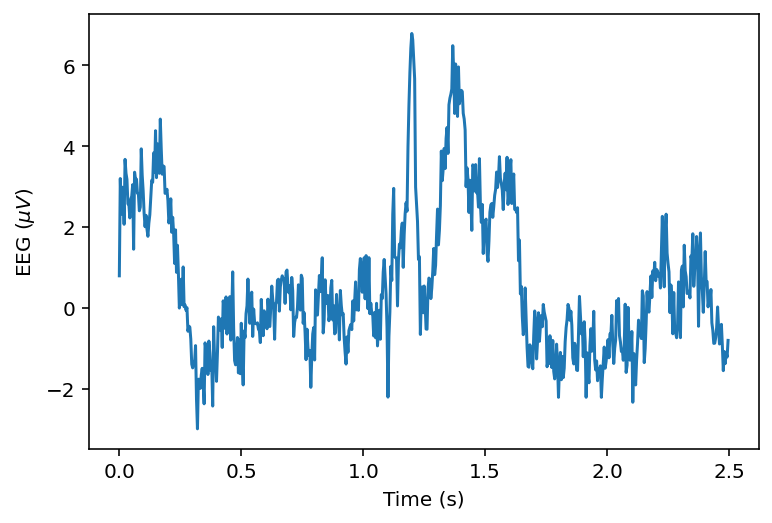

In [3]:
import matplotlib.pyplot as plt

# plot of EEG waveform defined in cell above
plt.plot(time_s, eeg_uV)
plt.xlabel('Time (s)')
plt.ylabel('EEG ($\mu V$)');

---
1a. (5 pts) What are the sample and Nyquist frequencies for the EEG recording? Make sure to specify your units.

In [4]:
sampleInterval_s = (time_s[1] - time_s[0]) / 1000
sampleFreq_Hz = 1 / sampleInterval_s
nyquistFreq_Hz = sampleFreq_Hz / 2

print(f"Sample  frequency = {sampleFreq_Hz :.2f} Hz")
print(f"Nyquist frequency = {nyquistFreq_Hz :.2f} Hz")

Sample  frequency = 256000.00 Hz
Nyquist frequency = 128000.00 Hz


---
1b. (5 pts) Downsample the EEG at one tenth ($\frac{1}{10}$) the sample frequency without introducing aliasing artifacts. Plot the original EEG overlaid with the downsampled EEG. Denote which is which in a legend.

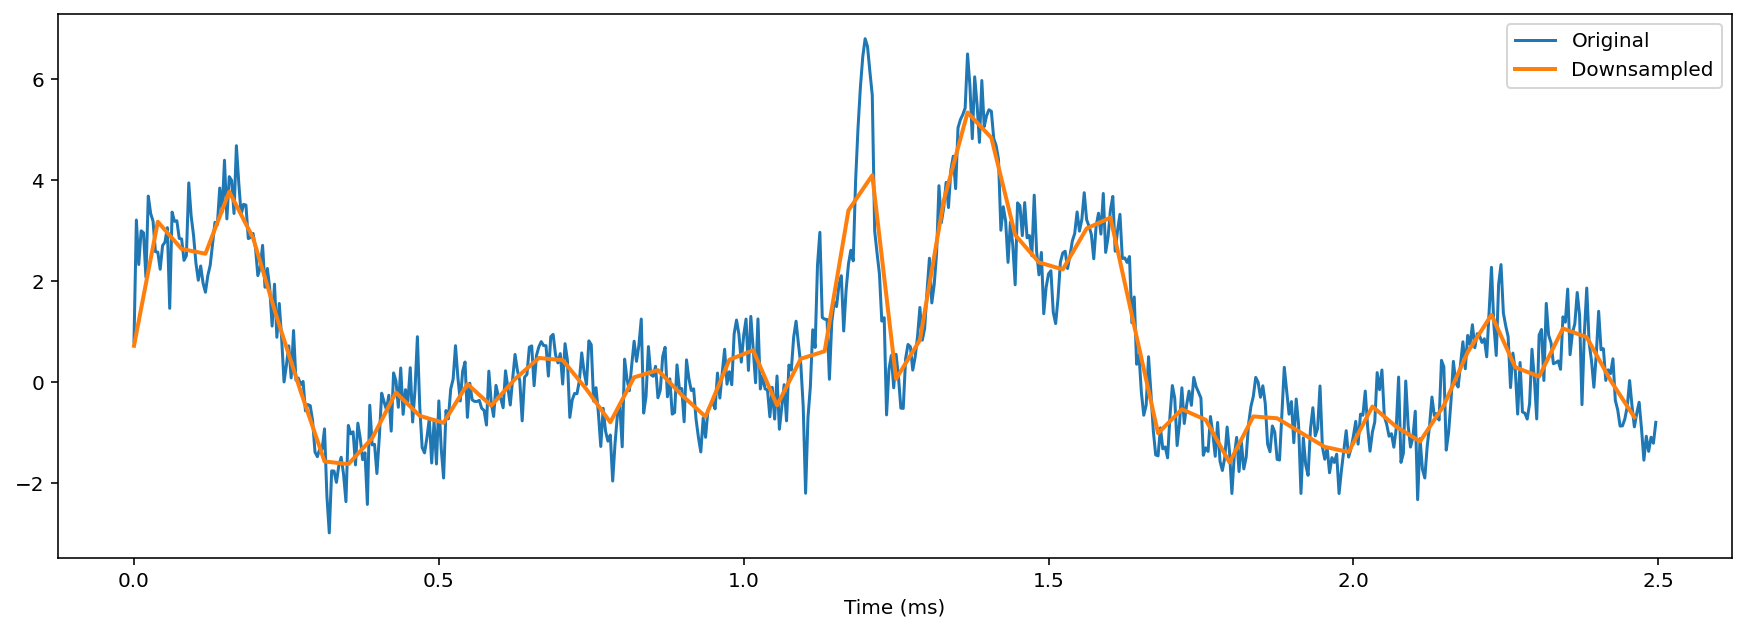

In [5]:
subtime_s = time_s[::10]
subdata = signal.decimate(eeg_uV, 10)

plt.figure(figsize=(15,5))
plt.plot(time_s, eeg_uV, label='Original')
plt.plot(subtime_s, subdata, lw=2, label='Downsampled')
plt.xlabel('Time (ms)')
plt.legend();

---
1c. (5 pts) Filter the data with a bandpass filter between 5 and 40 Hz. Plot the original unfiltered EEG overlaid with the filtered EEG. Denote which is which in a legend.

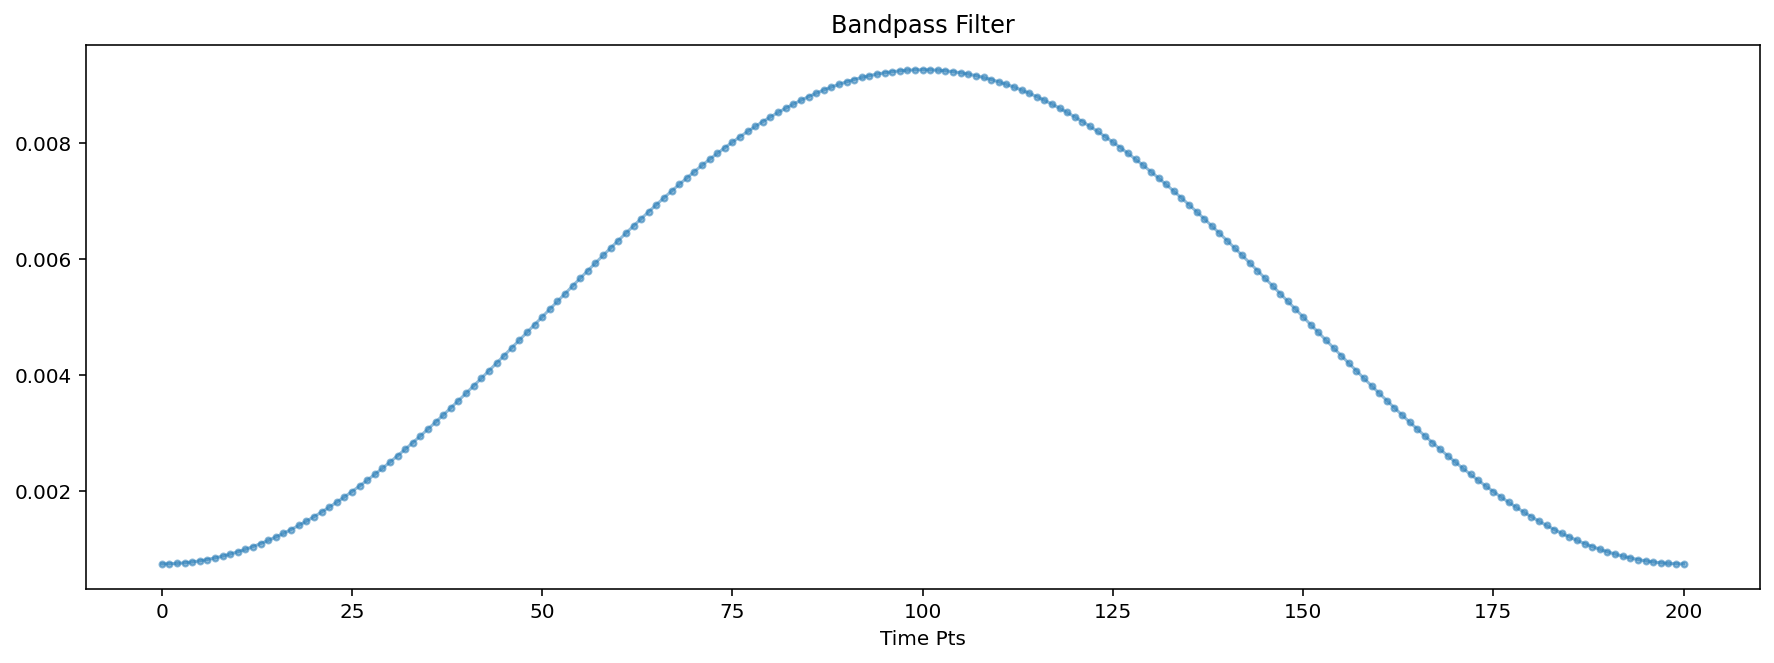

In [6]:
bandpass = signal.firwin(201, [5, 40], pass_zero=False, nyq=nyquistFreq_Hz)

plt.figure(figsize=(15,5))
plt.plot(bandpass, '.-', alpha=0.5)
plt.xlabel('Time Pts')
plt.title('Bandpass Filter');

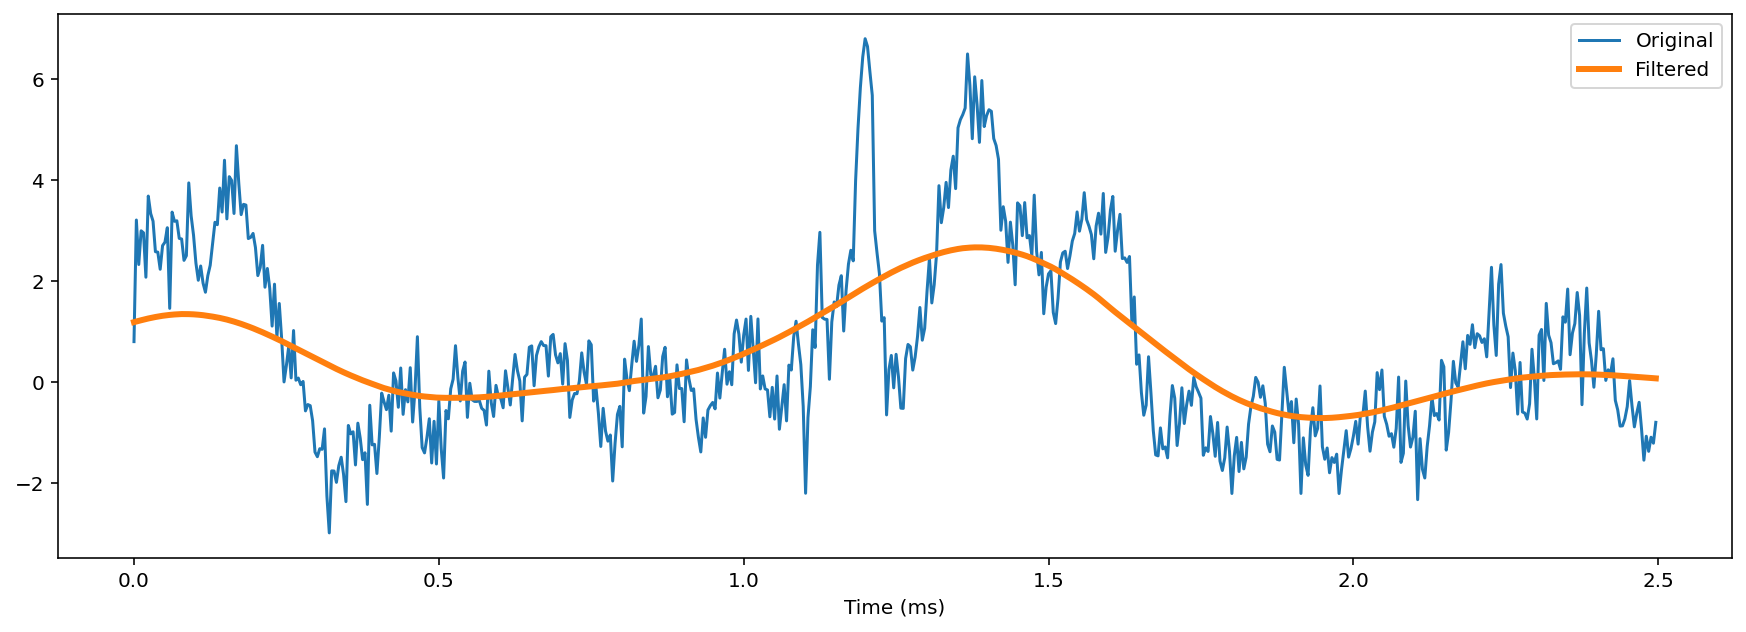

In [7]:
filteredData = np.convolve(eeg_uV, bandpass, 'same')

plt.figure(figsize=(15,5))
plt.plot(time_s, eeg_uV, label='Original')
plt.plot(time_s, filteredData, label='Filtered', linewidth=3)
plt.xlabel('Time (ms)')
plt.legend();

---
---
2. The following three questions 2a, 2b and 2c refer to the dataset in the accompanying file `nicotinic_receptors.csv` available on the course GitHub repo in the same folder as this exam notebook file. This dataset describes the effect of age and cotinine levels on the concentration of brain nicotinic receptors. Note: Generic units for *cotinine* and *receptor* columns are *level* and *concentration*, respectively.

In [8]:
nachr = pd.read_csv('nicotinic_receptors.csv', index_col=0)
nachr

,age,cotinine,receptor
0,69.0,59.61,5.07
1,68.0,40.33,4.87
2,65.0,37.30,5.08
3,91.0,17.78,3.90
4,69.0,54.01,6.36
5,71.0,45.47,5.30
6,66.0,39.36,5.01
7,84.0,37.92,6.00
8,88.0,56.49,3.63
9,77.0,44.37,3.99


---
2a. (5 pts) Split the data into an array of features X (two columns for age and cotinine) and an array of target data y (nicotinic receptor brain concentration). Standardize the feature data X.

In [9]:
X = nachr.drop(["receptor"], axis=1)
y = nachr["receptor"]

Xmu = X.mean(axis=0)
Xstd = X.std(axis=0)
Xs = (X - Xmu) / Xstd

---
2b. (5 pts) Fit a K nearest neighbors model to the relation between the feature and target data. Since the dataset is small, train the model on the entire dataset. Use 10-fold cross validation to determine the optimal choice of K in the range K=1 to K=20. Plot the mean squared validation error for each value of K tested, and report your choice for the value of K.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=1)

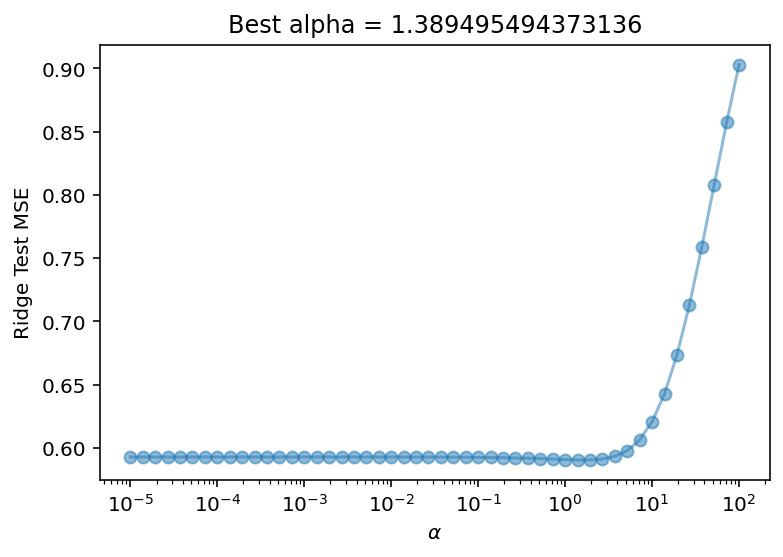

Best K = 1.39


In [11]:
alphas = np.logspace(-5, 2, 50)
mse = np.zeros(alphas.shape)

for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    results = cross_validate(model, Xs, y, cv=10, scoring='neg_mean_squared_error')
    mse[i] = -results['test_score'].mean()

ind = np.argmin(mse)
alpha = alphas[ind]
plt.plot(alphas, mse, 'o-', alpha=0.5)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Ridge Test MSE')
plt.title(f"Best alpha = {alpha}")
plt.show()

params = {'alpha': np.logspace(-5, 2, 50)}
model = Ridge()
cvmodel = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
cvmodel.fit(Xs, y)
alpha = cvmodel.best_params_['alpha']
print(f"Best K = {alpha :.2f}")

---
2c. (5 pts) Fit a K nearest neighbors model to the entire dataset using the value of K determined in 2b above. Given a new subject age 80 with a cotinine level of 40, predict the subject's nicotinic receptor brain concentration. Note: you do not need to specify any specific units, just report your prediction as a concentration.

In [12]:
params = {'alpha': np.logspace(-5, 2, 50)}
model = Ridge()
cvmodel = GridSearchCV(model, params, cv=2, scoring='neg_mean_squared_error')
cvmodel.fit(Xs, y)
c = cvmodel.best_params_['alpha']
print(f"Predicted Concentration = {c :.2f}")

Predicted Concentration = 7.20


---
---
3. The following three questions 3a, 3b and 3c refer to the Tappy keystroke dataset in the accompanying file `tappy_keystroke_stats.csv` available on the course GitHub repo in the same folder as this exam notebook file. This original data used to generate this dataset is available online at https://www.kaggle.com/valkling/tappy-keystroke-data-with-parkinsons-patients. The dataset describes automated keypress tracking during typing for subjects either with or without mild Parkinson's disease. Each row of the dataset is a subject with a unique ID. The columns of the dataset describe several statistics for distributions of the time each key was held by either the left (L) or right (R) hand and the time between successive key presses by the same hand (e.g. LL) or between hands (e.g. LR). The last column indicates whether or not the subject had Parkinsons. The unit of time used is not critical for this exam, but I would guess that all times are probably in milleseconds.

In [13]:
keystrokes = pd.read_csv('tappy_keystroke_stats.csv', index_col=0)
keystrokes

,mean_L,mean_R,std_L,std_R,skew_L,skew_R,kurtosis_L,kurtosis_R,mean_hold_diff,mean_LL,...,skew_LR,skew_RL,skew_RR,kurtosis_LL,kurtosis_LR,kurtosis_RL,kurtosis_RR,mean_LR_RL_diff,mean_LL_RR_diff,Parkinsons
ID,,,,,,,,,,,,,,,,,,,,,
48DZPAJ5NS,125.093648,125.944823,21.344768,20.440962,0.433347,0.122130,5.116874,5.692705,-0.851175,300.190663,...,0.020670,0.143658,-0.052046,-0.565283,-0.705773,-0.929929,-1.042327,14.221029,-32.314242,True
5PQVTWULAC,131.724002,113.398834,37.064749,29.041533,0.978465,-0.062599,7.127388,0.907739,18.325168,358.358252,...,-0.016904,0.386154,0.611069,2.024448,-0.323100,-0.000415,0.306093,24.435956,-24.794478,True
5USOYSDCXB,72.152276,74.706504,26.076473,23.756390,0.141122,-0.265969,0.888681,1.671472,-2.554228,177.817371,...,3.126761,2.885283,1.269504,8.081838,14.456914,11.615300,6.435207,-5.769697,1.055860,True
6LB9FQABZQ,126.497906,98.527829,66.799577,48.547446,0.268232,0.054386,0.026491,0.672722,27.970077,164.435681,...,2.475045,2.705128,2.303681,6.808226,7.120620,11.073373,7.515809,7.280438,10.821217,False
81NEUZEBXI,129.715948,128.692870,38.823109,41.264629,0.309899,0.511903,1.394108,1.878552,1.023078,290.175870,...,-0.044029,0.535980,-0.172322,-0.741370,-1.120918,-1.034998,-0.787168,33.513200,-8.270847,False
8O9IAIA9L1,86.372264,98.475048,32.266916,49.480572,0.926908,22.776487,2.932109,1131.441136,-12.102785,217.950469,...,2.198523,2.210455,2.046020,7.687335,5.908881,7.503160,5.253490,4.541789,2.363081,False
9RCEHVGNCJ,122.474658,121.237843,67.000131,31.916202,-0.091724,-0.705349,-0.823919,1.681515,1.236814,278.909500,...,1.965561,1.715084,1.152110,0.837801,4.142594,4.491134,1.826083,-23.957022,-10.160714,False
AVNGRDUXE5,142.921354,108.386427,57.753453,38.784003,-0.065772,0.834619,0.959280,1.998430,34.534927,350.024685,...,1.006778,0.786991,1.256252,0.090118,0.331201,-0.125269,1.329655,-22.298242,67.245007,False
BFXNVL50DC,115.139464,96.987137,60.904352,36.655797,0.450389,0.955794,-0.405545,5.082330,18.152327,181.764657,...,1.413909,1.508708,1.025202,1.889730,1.858054,2.309538,1.324145,8.760251,0.648895,False


---
3a. (5 pts) Split the data into training and testing sets (e.g. X_train, y_train, X_test, y_test) with 50% of the data in each set. The features X should be the keystroke timing statistics, and the target y should be whether the subject had Parkinsons.

In [14]:
X = keystrokes.drop(["Parkinsons"], axis=1)
y = keystrokes["Parkinsons"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.5)

---
3b. (5 pts) Train a Random Forest classifier with 100 trees to classify subjects as either control or Parkinson's patients based on their keystroke timing data. Ater training the classifier on the training set, report the classifier's overall accuracy at predicting subjects with Parkinsons in the testing set.

In [15]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_y_test_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_test_pred)

accuracySummary = pd.DataFrame([[rf_accuracy]], columns=['Random Forest'], index=['Accuracy'])
accuracySummary

,Random Forest
Accuracy,0.576923


---
3c. (5 pts) Plot a confusion matrix for the models predictions vs. known Parkinson's patients in the testing set. What is the most frequent mistake (if any) the classifer made? Would you use this classifier to predict Parkinsons in new patients from keystroke data?

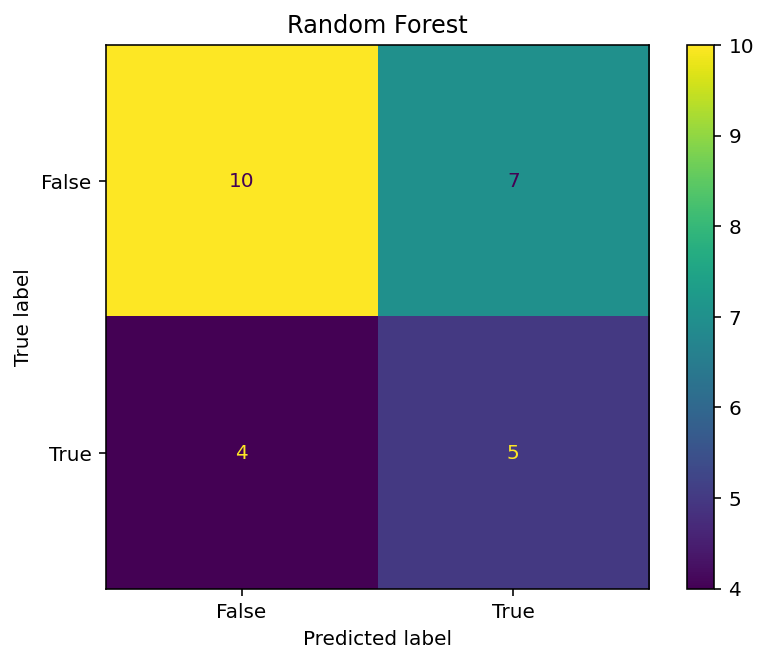

In [16]:
rf_cm = confusion_matrix(y_test, rf_y_test_pred)

plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,2)
cmd = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
cmd.plot(ax=ax)
plt.title('Random Forest');

---